# Sarcasm Detector

## Get and Load Data

In [211]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [212]:
!gdown --id 1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz
To: /content/SarcasmDetect.json
100% 6.06M/6.06M [00:00<00:00, 153MB/s]


In [213]:
import pandas as pd

df = pd.read_json('./SarcasmDetect.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Remove all records with no headline text

In [214]:
df = df[df['headline'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 894.3+ KB


In [215]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [208]:
df.drop('article_link', inplace=True, axis=1)
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

In [217]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('europarl_raw')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package europarl_raw to /root/nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [218]:
stopwords = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stopwords.update(punctuation)

In [219]:
def strip_html(sentence):
    soup = BeautifulSoup(sentence, "html.parser")
    return soup.get_text()

def remove_stopwords(sentence):
    final_text = []
    for i in sentence.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

def clean_text(sentence):
    sentence = strip_html(sentence)
    text = remove_stopwords(sentence)
    return sentence

df['headline']=df['headline'].apply(clean_text)

In [220]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [222]:
X = df.drop(columns=['is_sarcastic'])
y = df['is_sarcastic']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((20033, 2), (8586, 2))

In [223]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({0: 10530, 1: 9503}), Counter({0: 4455, 1: 4131}))

In [ ]:
X_train.head()

,headline
12170,american express to offer 5 months of paternit...
28552,watch: dolphin knocks stand-up paddleboarder o...
6883,man who enjoys thing informed he is wrong
28387,jonathan lipnicki to star as young 'dark helme...
12932,publicist worried kanye west's support of trum...


#Model 1: FastText Embeddings + CNN

In [ ]:
train_clean_text = X_train['headline']
test_clean_text = X_test['headline']


In [ ]:
t = tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(train_clean_text)
t.word_index['<PAD>'] = 0

In [ ]:
print(max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]),
      min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]),
      t.word_index['<UNK>'])

('archaeologist', 25972) ('<PAD>', 0) 1


In [ ]:
train_sequences = t.texts_to_sequences(train_clean_text)
test_sequences = t.texts_to_sequences(test_clean_text)

In [ ]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))
max(len(i) for i in train_sequences) 
max(len(doc.split()) for doc in train_clean_text) 

Vocabulary size=25973
Number of Documents=20033


39

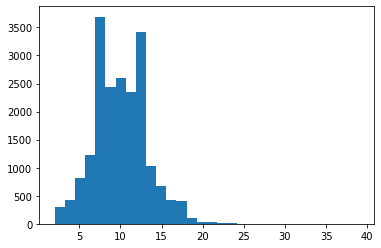

In [249]:
plt.hist([len(doc.split()) for doc in train_clean_text], bins=30);


In [244]:
MAX_SEQUENCE_LENGTH = 18

# pad dataset to a maximum review length in words
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train_padded.shape, X_test_padded.shape

((20033, 18), (8586, 18))

In [245]:
VOCAB_SIZE = len(t.word_index)
EMBED_SIZE = 300
EPOCHS=100
BATCH_SIZE=32

In [246]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip


--2023-01-13 15:17:30--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5828358084 (5.4G) [application/zip]
Saving to: ‘crawl-300d-2M-subword.zip.2’

crawl-300d-2M-subwo 100%[===================>]   5.43G  30.3MB/s    in 3m 13s  

2023-01-13 15:20:44 (28.8 MB/s) - ‘crawl-300d-2M-subword.zip.2’ saved [5828358084/5828358084]



In [ ]:
!unzip crawl-300d-2M-subword.zip


Archive:  crawl-300d-2M-subword.zip
replace crawl-300d-2M-subword.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace crawl-300d-2M-subword.bin? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace crawl-300d-2M-subword.bin? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
word2idx = t.word_index
FASTTEXT_INIT_EMBEDDINGS_FILE = './crawl-300d-2M-subword.vec'


def load_pretrained_embeddings(word_to_index, max_features, embedding_size, embedding_file_path):

    def get_coefs(word,*arr):
        return word, np.asarray(arr, dtype='float32')

    embeddings_index = dict(get_coefs(*row.split(" "))
                                for row in open(embedding_file_path, encoding="utf8", errors='ignore')
                                    if len(row)>100)

    all_embs = np.stack(embeddings_index.values())
    emb_mean, emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]

    nb_words = min(max_features, len(word_to_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_size))

    for word, idx in word_to_index.items():
        if idx >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [ ]:
ft_embeddings = load_pretrained_embeddings(word_to_index=word2idx, 
                                           max_features=VOCAB_SIZE, 
                                           embedding_size=EMBED_SIZE, 
                                           embedding_file_path=FASTTEXT_INIT_EMBEDDINGS_FILE)
ft_embeddings.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


(25973, 300)

In [ ]:
# create the model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(VOCAB_SIZE, EMBED_SIZE,
                                    weights=[ft_embeddings],
                                    trainable=True,
                                    input_length=MAX_SEQUENCE_LENGTH))

model.add(tf.keras.layers.Conv1D(filters=256, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 300)           7791900   
                                                                 
 conv1d (Conv1D)             (None, 15, 256)           307456    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 256)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 128)            131200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 128)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 64)             3

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=2,
                                      restore_best_weights=True,
                                      verbose=1)

model.fit(X_train_padded, y_train, 
          validation_split=0.1,
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          shuffle=True,
          callbacks=[es],
          verbose=1)

Epoch 1/100
564/564 [==============================] - 15s 6ms/step - loss: 0.3874 - accuracy: 0.8165 - val_loss: 0.3063 - val_accuracy: 0.8718
Epoch 2/100
564/564 [==============================] - 3s 5ms/step - loss: 0.1219 - accuracy: 0.9556 - val_loss: 0.3938 - val_accuracy: 0.8593
Epoch 3/100
564/564 [==============================] - 3s 5ms/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.7327 - val_accuracy: 0.8503
Epoch 3: early stopping


In [ ]:
predictions = (model.predict(X_test_padded) > 0.5).astype("int32")

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

269/269 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4455
           1       0.87      0.87      0.87      4131

    accuracy                           0.87      8586
   macro avg       0.87      0.87      0.87      8586
weighted avg       0.87      0.87      0.87      8586



,0,1
0,3905,550
1,525,3606


#Model 2: BERT

In [224]:
!pip install transformers --ignore-installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached huggingface_hub-0.11.1-py3-none-any.whl (182 kB)
  Using cached PyYAML-6.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (701 kB)
  Using cached tokenizers-0.13.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)
  Using cached filelock-3.9.0-py3-none-any.whl (9.7 kB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached regex-2022.10.31-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (772 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached charset_normalizer-3.0.1-cp38-cp38-manylinux_2_17_x

In [225]:
import transformers
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

In [264]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('europarl_raw')
nltk.download('averaged_perceptron_tagger')

df = pd.read_json('./SarcasmDetect.json', lines=True)
df.drop('article_link', inplace=True, axis=1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package europarl_raw to /root/nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [227]:
stopwords = set(stopwords.words('english'))

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text


def remove_stopwords(sentence):
    final_text = []
    for i in sentence.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

def clean_text(sentence):
    sentence = strip_html(sentence)
    text = remove_stopwords(sentence)
    return sentence

df['headline']=df['headline'].apply(clean_text)


In [258]:
X = df.drop(columns=['is_sarcastic'])
y = df['is_sarcastic']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((20033, 1), (8586, 1))

In [265]:
X = df.drop(columns=['is_sarcastic'])
y = df['is_sarcastic']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((20033, 1), (8586, 1))

In [229]:
X_train

,headline
12170,american express to offer 5 months of paternit...
28552,watch: dolphin knocks stand-up paddleboarder o...
6883,man who enjoys thing informed he is wrong
28387,jonathan lipnicki to star as young 'dark helme...
12932,publicist worried kanye west's support of trum...
...,...
21575,turnout lower than expected for gala central a...
5390,retreating clinton campaign torches iowa town ...
860,national weather service to give hurricanes fu...
15795,christ returns for some of his old things


In [257]:
train_clean_text = X_train['headline']
test_clean_text = X_test['headline']


In [268]:
train_text = X_train['headline']
test_text = X_test['headline']


In [266]:
def create_bert_input_features(tokenizer, docs, max_seq_length):
    
    all_ids, all_masks, all_segments= [], [], []
    for doc in tqdm.tqdm(docs, desc="Converting docs to features"):
        
        tokens = tokenizer.tokenize(doc)
        
        if len(tokens) > max_seq_length-2:
            tokens = tokens[0 : (max_seq_length-2)]
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        ids = tokenizer.convert_tokens_to_ids(tokens)
        masks = [1] * len(ids)
        
        # Zero-pad up to the sequence length.
        while len(ids) < max_seq_length:
            ids.append(0)
            masks.append(0)
            
        segments = [0] * max_seq_length
        all_ids.append(ids)
        all_masks.append(masks)
        all_segments.append(segments)
        
    encoded = np.array([all_ids, all_masks, all_segments])
    
    return encoded

In [267]:
MAX_SEQ_LENGTH = 18

inp_id = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_ids")
inp_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_masks")
inp_segment = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_segment_ids")
inputs = [inp_id, inp_mask, inp_segment]

hidden_state = transformers.TFBertModel.from_pretrained('bert-base-uncased')(inputs)
pooled_output = hidden_state[1]
dense1 = tf.keras.layers.Dense(256, activation='relu')(pooled_output)
drop1 = tf.keras.layers.Dropout(0.25)(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.25)(dense2)
output = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5,
                                           epsilon=1e-08),
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bert_input_ids (InputLayer)    [(None, 18)]         0           []                               
                                                                                                  
 bert_input_masks (InputLayer)  [(None, 18)]         0           []                               
                                                                                                  
 bert_segment_ids (InputLayer)  [(None, 18)]         0           []                               
                                                                                                  
 tf_bert_model_7 (TFBertModel)  TFBaseModelOutputWi  109482240   ['bert_input_ids[0][0]',         
                                thPoolingAndCrossAt               'bert_input_masks[0][0]',

In [251]:
pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [252]:
import tqdm

In [261]:
train_features_ids, train_features_masks, train_features_segments = create_bert_input_features(tokenizer, 
                                                                                               train_clean_text, 
                                                                                               max_seq_length=MAX_SEQ_LENGTH)

Converting docs to features: 100%|██████████| 20033/20033 [00:06<00:00, 3158.66it/s]


In [269]:
train_features_ids, train_features_masks, train_features_segments = create_bert_input_features(tokenizer, 
                                                                                               train_text, 
                                                                                               max_seq_length=MAX_SEQ_LENGTH)

Converting docs to features: 100%|██████████| 20033/20033 [00:07<00:00, 2742.79it/s]


In [262]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=3,
                                      restore_best_weights=True,
                                      verbose=1)
model.fit([train_features_ids, 
           train_features_masks, 
           train_features_segments], y_train, 
          validation_split=0.1,
          epochs=10, 
          batch_size=25, 
          callbacks=[es],
          shuffle=True,
          verbose=1)

Epoch 1/10
722/722 [==============================] - 40s 55ms/step - loss: 0.0636 - accuracy: 0.9784 - val_loss: 0.3069 - val_accuracy: 0.9092
Epoch 2/10
722/722 [==============================] - 39s 55ms/step - loss: 0.0301 - accuracy: 0.9895 - val_loss: 0.3426 - val_accuracy: 0.9237
Epoch 3/10
722/722 [==============================] - 40s 55ms/step - loss: 0.0214 - accuracy: 0.9922 - val_loss: 0.3174 - val_accuracy: 0.9296
Epoch 4/10
722/722 [==============================] - 40s 55ms/step - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.3433 - val_accuracy: 0.9247
Epoch 4: early stopping


In [270]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=3,
                                      restore_best_weights=True,
                                      verbose=1)
model.fit([train_features_ids, 
           train_features_masks, 
           train_features_segments], y_train, 
          validation_split=0.1,
          epochs=10, 
          batch_size=25, 
          callbacks=[es],
          shuffle=True,
          verbose=1)

Epoch 1/10
722/722 [==============================] - 61s 62ms/step - loss: 0.3081 - accuracy: 0.8684 - val_loss: 0.2177 - val_accuracy: 0.9122
Epoch 2/10
722/722 [==============================] - 41s 57ms/step - loss: 0.1405 - accuracy: 0.9478 - val_loss: 0.2090 - val_accuracy: 0.9227
Epoch 3/10
722/722 [==============================] - 40s 55ms/step - loss: 0.0634 - accuracy: 0.9773 - val_loss: 0.2361 - val_accuracy: 0.9212
Epoch 4/10
722/722 [==============================] - 40s 55ms/step - loss: 0.0345 - accuracy: 0.9881 - val_loss: 0.2979 - val_accuracy: 0.9291
Epoch 5/10
722/722 [==============================] - 40s 55ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.3884 - val_accuracy: 0.9037
Epoch 5: early stopping


In [263]:
test_features_ids, test_features_masks, test_features_segments = create_bert_input_features(tokenizer, 
                                                                                               test_clean_text, 
                                                                                               max_seq_length=MAX_SEQ_LENGTH)

predictions = [1 if pr > 0.5 else 0 
                   for pr in model.predict([test_features_ids, 
                                            test_features_masks, 
                                            test_features_segments], verbose=0).ravel()]

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Converting docs to features: 100%|██████████| 8586/8586 [00:02<00:00, 3157.74it/s]


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4455
           1       0.96      0.86      0.91      4131

    accuracy                           0.91      8586
   macro avg       0.92      0.91      0.91      8586
weighted avg       0.92      0.91      0.91      8586



,0,1
0,4298,157
1,583,3548


In [271]:
test_features_ids, test_features_masks, test_features_segments = create_bert_input_features(tokenizer, 
                                                                                               test_text, 
                                                                                               max_seq_length=MAX_SEQ_LENGTH)

predictions = [1 if pr > 0.5 else 0 
                   for pr in model.predict([test_features_ids, 
                                            test_features_masks, 
                                            test_features_segments], verbose=0).ravel()]

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Converting docs to features: 100%|██████████| 8586/8586 [00:02<00:00, 3161.94it/s]


              precision    recall  f1-score   support

           0       0.90      0.95      0.93      4455
           1       0.94      0.89      0.92      4131

    accuracy                           0.92      8586
   macro avg       0.92      0.92      0.92      8586
weighted avg       0.92      0.92      0.92      8586



,0,1
0,4238,217
1,460,3671


# Model 3: Google’s Universal Sentence Encoder

In [ ]:
pip install tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_hub as hub

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.load(module_url)

In [ ]:
message_embeddings = embed(train_clean_text[:3])

message_embeddings, message_embeddings.shape

(<tf.Tensor: shape=(3, 512), dtype=float32, numpy=
 array([[-0.00478008, -0.00732873, -0.05209935, ..., -0.01655614,
         -0.03615562,  0.02276065],
        [ 0.01799885,  0.06315714, -0.06206467, ..., -0.01246314,
         -0.0019664 , -0.05526358],
        [ 0.08690858,  0.01116739, -0.02501241, ..., -0.07879318,
          0.01009462,  0.04431401]], dtype=float32)>, TensorShape([3, 512]))

In [ ]:
model = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(model, output_shape=[512], input_shape=[],
                           dtype=tf.string, trainable=True)
print(hub_layer(np.array(train_clean_text)[:3]))

tf.Tensor(
[[-0.00478008 -0.00732873 -0.05209935 ... -0.01655614 -0.03615562
   0.02276065]
 [ 0.01799885  0.06315714 -0.06206467 ... -0.01246314 -0.0019664
  -0.05526358]
 [ 0.08690858  0.01116739 -0.02501241 ... -0.07879318  0.01009462
   0.04431401]], shape=(3, 512), dtype=float32)


In [ ]:
model = tf.keras.models.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_41 (Dropout)        (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_42 (Dropout)        (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 256,995,201
Trainable params: 256,995,20

In [ ]:
EPOCHS=100
BATCH_SIZE=128

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=2,
                                      restore_best_weights=True,
                                      verbose=1)

model.fit(train_clean_text, y_train,
          validation_split=0.1,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          shuffle=True,
          callbacks=[es],
          verbose=1)

Epoch 1/100
141/141 [==============================] - 14s 57ms/step - loss: 0.4217 - accuracy: 0.7987 - val_loss: 0.3083 - val_accuracy: 0.8713
Epoch 2/100
141/141 [==============================] - 7s 46ms/step - loss: 0.1233 - accuracy: 0.9549 - val_loss: 0.3706 - val_accuracy: 0.8613
Epoch 3/100
141/141 [==============================] - 7s 49ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.5394 - val_accuracy: 0.8633
Epoch 3: early stopping


In [ ]:
predictions = (model.predict(test_clean_text) > 0.5).astype("int32")

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

269/269 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4455
           1       0.85      0.86      0.86      4131

    accuracy                           0.86      8586
   macro avg       0.86      0.86      0.86      8586
weighted avg       0.86      0.86      0.86      8586



,0,1
0,3837,618
1,566,3565


#Model 4: DistilBERT

In [ ]:
def create_bert_input_features(tokenizer, docs, max_seq_length):

    all_ids, all_masks = [], []
    for doc in tqdm.tqdm(docs, desc="Converting docs to features"):

        tokens = tokenizer.tokenize(doc)

        if len(tokens) > max_seq_length-2:
            tokens = tokens[0 : (max_seq_length-2)]
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        ids = tokenizer.convert_tokens_to_ids(tokens)
        masks = [1] * len(ids)

        # Zero-pad up to the sequence length.
        while len(ids) < max_seq_length:
            ids.append(0)
            masks.append(0)

        all_ids.append(ids)
        all_masks.append(masks)

    encoded = np.array([all_ids, all_masks])

    return encoded

In [ ]:
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


In [ ]:
MAX_SEQ_LENGTH = 20

inp_id = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_ids")
inp_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_masks")
inputs = [inp_id, inp_mask]

hidden_state = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')(inputs)[0]
pooled_output = hidden_state[:, 0]
dense1 = tf.keras.layers.Dense(256, activation='relu')(pooled_output)
drop1 = tf.keras.layers.Dropout(0.25)(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.25)(dense2)
output = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)


model = tf.keras.Model(inputs=inputs, outputs=output)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5,
                                           epsilon=1e-08),
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bert_input_ids (InputLayer)    [(None, 20)]         0           []                               
                                                                                                  
 bert_input_masks (InputLayer)  [(None, 20)]         0           []                               
                                                                                                  
 tf_distil_bert_model_2 (TFDist  TFBaseModelOutput(l  66362880   ['bert_input_ids[0][0]',         
 ilBertModel)                   ast_hidden_state=(N               'bert_input_masks[0][0]']       
                                one, 20, 768),                                                    
                                 hidden_states=None                                         

In [ ]:
df = pd.read_json('./SarcasmDetect.json', lines=True)
df.drop('article_link', inplace=True, axis=1)

X = df.drop(columns=['is_sarcastic'])
y = df['is_sarcastic']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((20033, 1), (8586, 1))

In [ ]:
train_text = X_train['headline']
test_text = X_test['headline']

#train_text_distilled = create_bert_input_features(tokenizer=tokenizer, docs=train_text, max_seq_length=15)
#test_text_distilled = create_bert_input_features(tokenizer=tokenizer, docs=test_text, max_seq_length=15)

train_text[0]


'thirtysomething scientists unveil doomsday clock of hair loss'

In [ ]:
train_features_ids, train_features_masks = create_bert_input_features(tokenizer, train_text,
                                                                      max_seq_length=MAX_SEQ_LENGTH)



Converting docs to features: 100%|██████████| 20033/20033 [00:06<00:00, 2983.68it/s]


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=1,
                                      restore_best_weights=True,
                                      verbose=1)
model.fit([train_features_ids, 
           train_features_masks], y_train, 
          validation_split=0.1, 
          epochs=3, 
          batch_size=25, 
          callbacks=[es],
          shuffle=True,
          verbose=1)

Epoch 1/3
722/722 [==============================] - 22s 30ms/step - loss: 0.0607 - accuracy: 0.9773 - val_loss: 0.2667 - val_accuracy: 0.9152
Epoch 2/3
722/722 [==============================] - 22s 30ms/step - loss: 0.0314 - accuracy: 0.9893 - val_loss: 0.2992 - val_accuracy: 0.9251
Epoch 2: early stopping


In [ ]:
test_features_ids, test_features_masks = create_bert_input_features(tokenizer,
                                                                                            test_text,
                                                                                            max_seq_length=MAX_SEQ_LENGTH)


Converting docs to features: 100%|██████████| 8586/8586 [00:02<00:00, 3182.56it/s]


In [ ]:
predictions = [1 if pr > 0.5 else 0 
                   for pr in model.predict([test_features_ids, 
                                            test_features_masks], verbose=0).ravel()]

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4455
           1       0.94      0.88      0.91      4131

    accuracy                           0.91      8586
   macro avg       0.92      0.91      0.91      8586
weighted avg       0.91      0.91      0.91      8586



,0,1
0,4206,249
1,496,3635


#Model: NNLM

In [ ]:
model = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
hub_layer = hub.KerasLayer(model, output_shape=[128], input_shape=[],
                           dtype=tf.string, trainable=True)
print(hub_layer(np.array(train_text)[:3]))

tf.Tensor(
[[ 3.57945114e-01  2.26173311e-01  5.05215898e-02  3.86145748e-02
   1.63829848e-02  2.28191972e-01 -2.92895976e-02  1.19515978e-01
  -9.81539339e-02  1.91221640e-01 -1.41007570e-03  5.29745668e-02
  -2.03264922e-01 -6.29663318e-02 -1.24357373e-01 -1.56483948e-01
  -2.00918287e-01 -9.26442444e-02 -2.49357179e-01  1.00679114e-01
   1.32453799e-01  1.34884408e-02 -7.80382156e-02  8.32244474e-03
   7.07108155e-02 -5.70529774e-02  1.03408366e-01  7.47278258e-02
  -9.99622494e-02 -4.85057905e-02  4.82797474e-02  1.21224649e-01
  -1.88356880e-02  1.48607241e-02  1.11484230e-02  1.42782286e-01
   4.70928475e-03 -6.09535128e-02  1.62220746e-02  9.27565992e-02
   4.62270807e-03 -1.61197022e-01 -2.04416230e-01  4.75066267e-02
  -4.81367521e-02  8.93388838e-02  5.98970838e-02  8.30192342e-02
   2.08328348e-02  1.43283084e-01  7.22071901e-02 -1.18961617e-01
   5.66212349e-02  2.82502677e-02 -2.69849170e-02 -9.02097747e-02
   2.31102966e-02 -4.27247956e-02  4.79304492e-02 -2.18216509e-01

In [ ]:
model = tf.keras.models.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_106 (Dropout)       (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dropout_107 (Dropout)       (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 124,675,841
Trainable params: 124,675,84

In [ ]:
EPOCHS=100
BATCH_SIZE=128

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=3,
                                      restore_best_weights=True,
                                      verbose=1)

model.fit(np.array(train_text), y_train,
          validation_split=0.1,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          shuffle=True,
          callbacks=[es],
          verbose=1)

Epoch 1/100
141/141 [==============================] - 4s 20ms/step - loss: 0.4382 - accuracy: 0.7968 - val_loss: 0.3381 - val_accuracy: 0.8558
Epoch 2/100
141/141 [==============================] - 2s 16ms/step - loss: 0.1987 - accuracy: 0.9257 - val_loss: 0.3670 - val_accuracy: 0.8488
Epoch 3/100
141/141 [==============================] - 2s 16ms/step - loss: 0.0904 - accuracy: 0.9697 - val_loss: 0.4852 - val_accuracy: 0.8433
Epoch 4/100
141/141 [==============================] - 2s 17ms/step - loss: 0.0403 - accuracy: 0.9863 - val_loss: 0.6701 - val_accuracy: 0.8363
Epoch 4: early stopping


In [ ]:
predictions = (model.predict(np.array(test_text)) > 0.5).astype("int32")

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

269/269 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4455
           1       0.86      0.84      0.85      4131

    accuracy                           0.85      8586
   macro avg       0.85      0.85      0.85      8586
weighted avg       0.85      0.85      0.85      8586



,0,1
0,3874,581
1,678,3453


#Model: Bert with normalization 

In [ ]:
!pip install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 KB 13.9 MB/s eta 0:00:00


In [ ]:
import nltk
import contractions
import re
import tqdm


def normalize_document(doc):
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', ' ', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  

    return doc

def normalize_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        norm_doc = normalize_document(doc)
        norm_docs.append(norm_doc)

    return norm_docs

In [ ]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

def remove_stopwords(sentence):
  tokens = nltk.word_tokenize(sentence)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token not in stopwords]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text
  


def clean_text(text):
    text = strip_html(text)
    text = remove_stopwords(text)
    return text



In [ ]:
X_train['Clean Text'] = normalize_corpus(X_train['headline'].values)
X_test['Clean Text'] = normalize_corpus(X_test['headline'].values)



100%|██████████| 8586/8586 [00:00<00:00, 55612.80it/s]


In [ ]:
X_train['Clean Text'] = X_train['Clean Text'].apply(clean_text)
X_test['Clean Text'] = X_test['Clean Text'].apply(clean_text)


In [ ]:
train_clean_text=X_train['Clean Text']
test_clean_text=X_test['Clean Text']


In [ ]:
MAX_SEQ_LENGTH = 121

inp_id = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_ids")
inp_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_masks")

inputs = [inp_id, inp_mask]

hidden_state = transformers.TFBertModel.from_pretrained('bert-base-uncased')(inputs)
pooled_output = hidden_state[1]
dense1 = tf.keras.layers.Dense(256, activation='relu')(pooled_output)
drop1 = tf.keras.layers.Dropout(0.25)(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.25)(dense2)
output = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5,
                                           epsilon=1e-08),
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bert_input_ids (InputLayer)    [(None, 121)]        0           []                               
                                                                                                  
 bert_input_masks (InputLayer)  [(None, 121)]        0           []                               
                                                                                                  
 tf_bert_model_3 (TFBertModel)  TFBaseModelOutputWi  109482240   ['bert_input_ids[0][0]',         
                                thPoolingAndCrossAt               'bert_input_masks[0][0]']       
                                tentions(last_hidde                                               
                                n_state=(None, 121,                                         

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')


In [ ]:
train_features_ids, train_features_masks = create_bert_input_features(tokenizer, train_clean_text, max_seq_length=MAX_SEQ_LENGTH)

Converting docs to features: 100%|██████████| 20033/20033 [00:05<00:00, 3566.95it/s]


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=1,
                                      restore_best_weights=True,
                                      verbose=1)

model.fit([train_features_ids, train_features_masks], y_train, 
          validation_split=0.1,
          epochs=10, 
          batch_size=25, 
          callbacks=[es],
          shuffle=True,
          verbose=1)

Epoch 1/10
722/722 [==============================] - 71s 99ms/step - loss: 0.4113 - accuracy: 0.8132 - val_loss: 0.3451 - val_accuracy: 0.8443
Epoch 2/10
722/722 [==============================] - 68s 94ms/step - loss: 0.2330 - accuracy: 0.9069 - val_loss: 0.3224 - val_accuracy: 0.8568
Epoch 3/10
722/722 [==============================] - 68s 94ms/step - loss: 0.1107 - accuracy: 0.9608 - val_loss: 0.3832 - val_accuracy: 0.8723
Epoch 3: early stopping


In [ ]:
model.save_weights('bert_ft_wts.h5')


In [ ]:
test_features_ids, test_features_masks = create_bert_input_features(tokenizer, test_clean_text, max_seq_length=MAX_SEQ_LENGTH)

predictions = [1 if pr > 0.5 else 0
                   for pr in model.predict([test_features_ids,
                                            test_features_masks
                                            ], verbose=0).ravel()]

print("Accuracy: %.2f%%" % (accuracy_score(test_clean_text, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))


Converting docs to features: 100%|██████████| 8586/8586 [00:02<00:00, 3545.64it/s]


Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4455
           1       0.85      0.86      0.85      4131

    accuracy                           0.86      8586
   macro avg       0.86      0.86      0.86      8586
weighted avg       0.86      0.86      0.86      8586



,0,1
0,3839,616
1,587,3544
